In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
#importing dependencies
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

## **Reading the Cleaned Dataset**

In [2]:
df=pd.read_csv("Health_care.csv")

In [3]:
df.isnull().sum()

Product_id            0
description       80130
title                 0
imUrl                 0
related               0
salesRank             0
categories            0
price                 0
brand                 4
reviewerID            0
reviewerName         38
reviewText           77
overall               0
summary              10
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

<font color='sienna'> **As we converted the data to csv some empty strings were converted to null values as the number of null values is very less we will drop the values**.

In [4]:
df.drop('description',axis=1,inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df['reviewTime']=pd.to_datetime(df['reviewTime'])

In [7]:
df.dtypes

Product_id                object
title                     object
imUrl                     object
related                   object
salesRank                  int64
categories                object
price                    float64
brand                     object
reviewerID                object
reviewerName              object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
sentiment                 object
Helpful                    int64
Not_helpful                int64
helpful_rate             float64
neg                      float64
neu                      float64
pos                      float64
polarity                 float64
word_count                 int64
dtype: object

In [15]:
neg = df[(df['sentiment']=='Negative') & (df['reviewTime'] >= '2010-01-01')] #filtering as per negative sentiment

In [16]:
neg.head(2)

,Product_id,title,imUrl,related,salesRank,categories,price,brand,reviewerID,reviewerName,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,B0059IU3TG,Absonutrix Fucoxanthin Slim Patches - 30 Patch...,http://ecx.images-amazon.com/images/I/614vz80j...,"{'also_bought': ['B0059IAWNI', 'B005FYO4OE', '...",36711,"[['Health & Personal Care', 'Vitamins & Dietar...",15.95,Absonutrix Fucoxanthin Patch,A1L7MPGNGTCDOG,djpetrik,...,2014-02-12,Negative,0,0,0.0,0.000,1.000,0.000,0.0000,20
1,B001AJ6YS2,Philips Norelco 7310 Men's Shaving System,http://ecx.images-amazon.com/images/I/31kbFfBR...,"{'also_bought': ['B000068PBT', 'B001AJ8YGC', '...",15682,"[['Health & Personal Care', 'Personal Care', '...",79.99,Philips,AM12RRYC66CO1,"Tati Ard ""collegebuyer09""",...,2012-03-11,Negative,0,2,0.0,0.139,0.839,0.022,-0.7896,50


# Time series

In [17]:
d = pd.DataFrame(neg.groupby(['reviewTime'])['polarity'].sum())
d

,polarity
reviewTime,
2010-01-01,-0.6969
2010-01-02,1.2224
2010-01-03,-4.4825
2010-01-04,2.1153
2010-01-05,-0.1831
...,...
2014-07-19,-11.1988
2014-07-20,-2.6162
2014-07-21,2.0886


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose #to decompose time series data

In [20]:
pol = d['polarity']

In [21]:
#time series components
decomp2 = seasonal_decompose(pol,period =52)
d_trend2 = decomp2.trend #trend in the data
d_seasonal2 = decomp2.seasonal #seasonality in the data
d_residual2 = decomp2.resid #residuals in the data

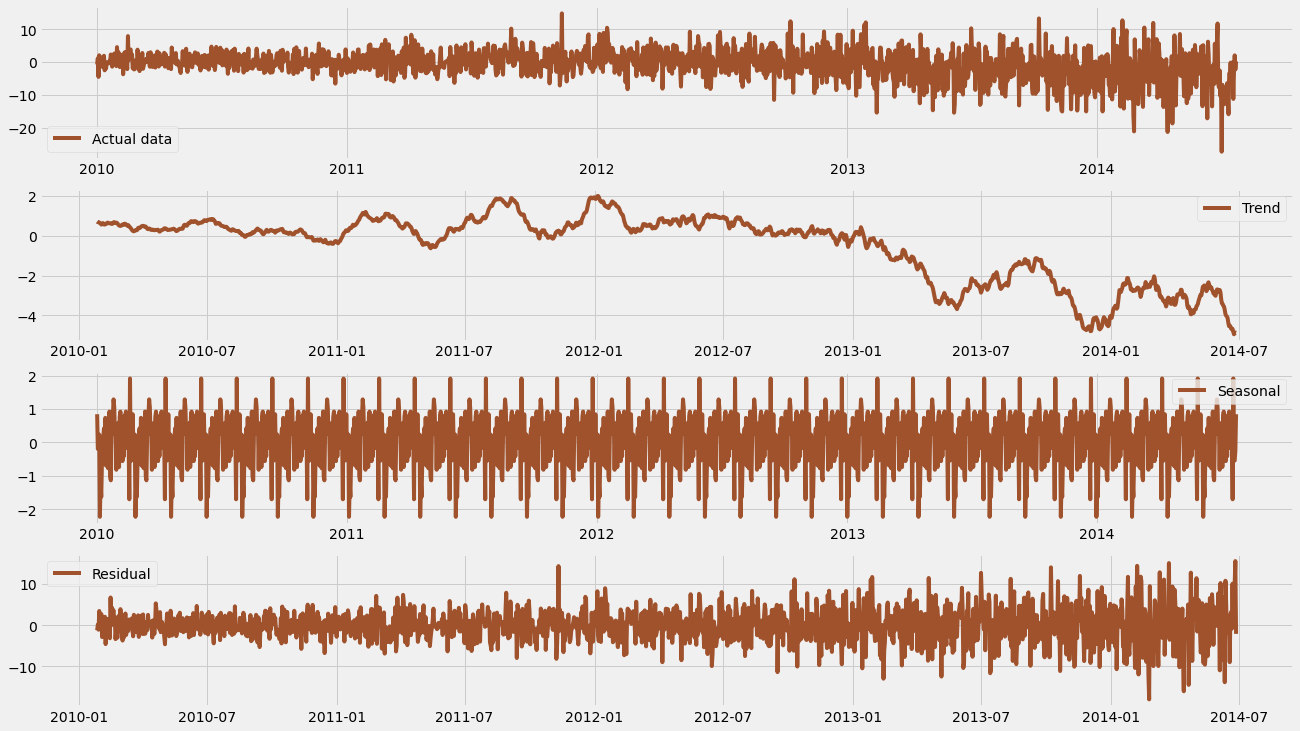

In [22]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(pol,label='Actual data',color='sienna')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend2,label='Trend',color='sienna')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal2,label='Seasonal',color='sienna')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual2,label='Residual',color='sienna')
plt.legend(loc='best')

plt.show()

### <div class="alert alert-warning">Interpretation:
  - The first visual shows the product sentiment which took place over years.
  - The second visual shows a positive trend.
  - The third visual shows a repeating pattern that mean there is some seasonality.
  - The fourth visual shows the irregularities in the dataset.
    </div>

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #for acf and pacf plots

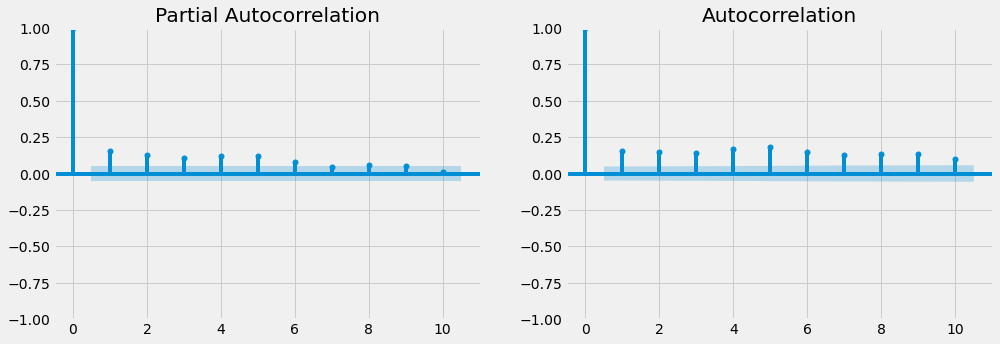

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plot_pacf(pol ,lags=10,ax=ax[0]);
plot_acf(pol,lags=10,ax = ax[1]);

### <div class="alert alert-warning">Interpretation:
  The above visual shows the autocorrelation and partial autocorrelation of the data where p =5 and q=10
</div>

In [26]:
from pmdarima.arima import auto_arima #for arima

In [27]:
auto = auto_arima(pol,start_p=0,max_p=5, start_q=0,max_q=10, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10589.718, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10126.817, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9516.753, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10587.718, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9517.364, Time=1.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9517.412, Time=0.93 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9520.598, Time=1.00 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9517.026, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.278 seconds


In [28]:
# split the data into train and test
split = int(0.8 * len(pol))

train = pol.iloc[:split] #training
test =  pol.iloc[split:] #testing
print("Train shape = {}, Test shape= {}".format(len(train), len(test))) 

Train shape = 1332, Test shape= 333


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX #for sarima and sarimax modelling
import statsmodels.api as sm #for checking model goodness

In [31]:
sarima_model = sm.tsa.statespace.SARIMAX(train,order=(0,1,1),seasonal_order =(0,1,1,52)).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
sarima_forecast = sarima_model.forecast(len(test))

In [33]:
sarima_forecast

2013-08-25   -2.723373
2013-08-26   -1.988422
2013-08-27   -1.899395
2013-08-28   -2.572415
2013-08-29   -2.093478
                ...   
2014-07-19   -2.563396
2014-07-20   -4.471697
2014-07-21   -3.139105
2014-07-22   -3.629201
2014-07-23   -2.786437
Freq: D, Name: predicted_mean, Length: 333, dtype: float64

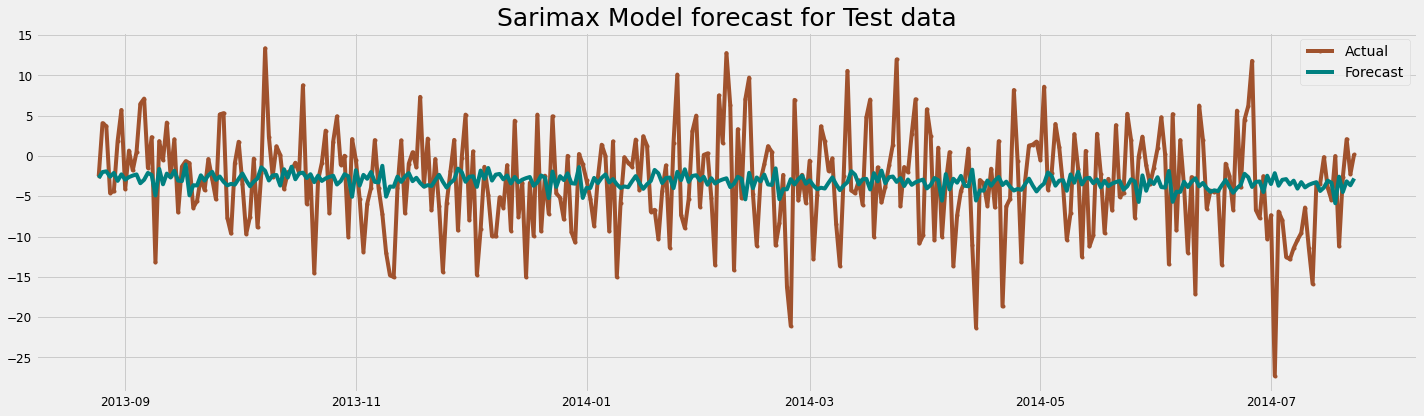

In [34]:
plt.figure(figsize=(20,6))
plt.title('Sarimax Model forecast for Test data',fontsize=25)
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarima_forecast,color = 'teal' , label = 'Forecast' )
plt.tick_params(labelsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error #for calculating errors
sarima_rmse = mean_squared_error(test,sarima_forecast,squared=False)
print('RMSE :',sarima_rmse)

sarima_aic = sarima_model.aic
sarima_bic = sarima_model.bic

print('sarima aic:',sarima_aic)
print('sarima bic:',sarima_bic)

RMSE : 6.229675027035857
sarima aic: 7041.879263451925
sarima bic: 7057.340764856662


In [36]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           polarity   No. Observations:                 1332
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -3517.940
Date:                            Fri, 09 Dec 2022   AIC                           7041.879
Time:                                    00:09:45   BIC                           7057.341
Sample:                                01-01-2010   HQIC                          7047.685
                                     - 08-24-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9799      0.005   -195.720      0.000      -0.990      -0.970
ma.S.L52      -0.9506      0.029    -32.639      0.000      -1.008      -0.894
sigma2        13.0413      0.470     27.746      0.000      12.120      13.963
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                56.68
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               3.98   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
pol.tail()

reviewTime
2014-07-19   -11.1988
2014-07-20    -2.6162
2014-07-21     2.0886
2014-07-22    -2.2429
2014-07-23     0.2540
Name: polarity, dtype: float64

__As the dates are not in frequency we will store them in seperate list and append them to the future predictions.__

In [38]:
from datetime import datetime, timedelta
datetime_str = '07/23/14'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y')
days = pd.date_range(datetime_object, datetime_object + timedelta(99), freq='D')
days

DatetimeIndex(['2014-07-23', '2014-07-24', '2014-07-25', '2014-07-26',
               '2014-07-27', '2014-07-28', '2014-07-29', '2014-07-30',
               '2014-07-31', '2014-08-01', '2014-08-02', '2014-08-03',
               '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07',
               '2014-08-08', '2014-08-09', '2014-08-10', '2014-08-11',
               '2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15',
               '2014-08-16', '2014-08-17', '2014-08-18', '2014-08-19',
               '2014-08-20', '2014-08-21', '2014-08-22', '2014-08-23',
               '2014-08-24', '2014-08-25', '2014-08-26', '2014-08-27',
               '2014-08-28', '2014-08-29', '2014-08-30', '2014-08-31',
               '2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
               '2014-09-05', '2014-09-06', '2014-09-07', '2014-09-08',
               '2014-09-09', '2014-09-10', '2014-09-11', '2014-09-12',
               '2014-09-13', '2014-09-14', '2014-09-15', '2014-09-16',
      

In [42]:
future_forecast = sarima_model.forecast(100)


In [43]:
df_p_f= pd.DataFrame(list(future_forecast),index=days)

In [44]:
df_p_f.head()

,0
2014-07-23,-2.723373
2014-07-24,-1.988422
2014-07-25,-1.899395
2014-07-26,-2.572415
2014-07-27,-2.093478


__We can observe that our future prediction data has a downward trend and seasonality present.__

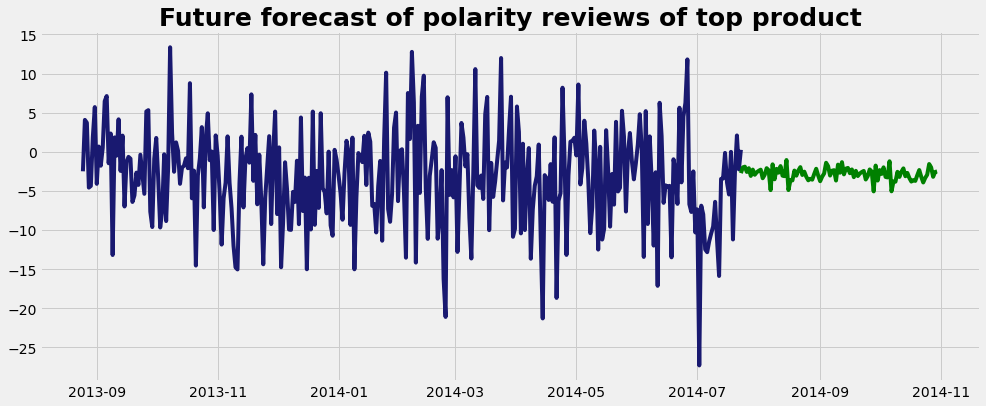

In [45]:
plt.figure(figsize=(15,6))
plt.title('Future forecast of polarity reviews of top product',fontsize=25,fontweight="bold")
plt.plot(test, color = 'midnightblue' , label = 'Actual')
plt.plot(df_p_f[0],color = 'green' , label = 'positive sentiment Forecast' )

plt.show()

### <div class="alert alert-warning">Interpretation:
  __The above visual shows future forecast for next 100 days using sarima model.__
</div>

# <div class="alert alert-success"><center>Inferences</div>
    
 - We are able to demonstrate how the sentiment of unstructured text data varies over time and utilise it to forecast future data trends by combining time series analysis with natural language processing. So, for our time series analysis, we gave the polarity feature some thought.
 - In order to predict future review sentiments for the goods included in the Health care and personal care dataset, we used the polarity feature for the most sold product.
 - we can see the trend of negative sentiments on macro level from year 2013 and above.
    
   
    

# <div class="alert alert-warning"><center>END</div>